### Features Detection

Local Features (interest points, corners, blobs and their descriptos) help in localizing matching features across images. Features are extremely useful tool and they are used in the following use cases: -

* Image alignment
* 3D reconstruction
* Motion tracking
* Object recognition
* Indexing and database retrieval
* Robot navigation


#### SIFT, SURF, ORB options of Corner Detector

SURF (Speeded Up Robust Features) works by applying an approximate Gaussian second derivative mask to an image at many scales. Because the feature detector applies masks along each axis and at 45 deg to the axis it is more ROBUST TO ROTATION than the Harris corner.

The method is very fast because of the use of an integral image (quite an important concept in Computer Vision - this concept is also used in Voila-Jones & Haar Features extraction)!

NOTE that SURF & SIFT are license protected for commercial use.


#### Harris, Shi-Toshi Corner Detector

Maths behind Harris Corner Detector is based on 2nd order Image Spatial Moments. Refer to this precie Udacity clip https://www.youtube.com/watch?v=xdDIFdUuUxU.

It determines which windows (small image patches) produce very large variations in intensity when moved in both X and Y directions (i.e. gradients).

Shi-Tomasi is improvised form of Harris Corner detector as how R-score is calculated. This gives a better result. No need to research the optimal value of R-score threshold, instead it allows for picking specified count of top values corners!

In [1]:
import os
import numpy as np
from scipy.ndimage import filters
from scipy import ndimage

import cv2
import matplotlib.pyplot as plt
import matplotlib.image as plt_img
from matplotlib.pyplot import figure

%matplotlib notebook

In [2]:
imgBGR = cv2.imread('./res/chess.jpg')
imgGRAY = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2GRAY)

In [3]:
'''
#### ===================================
#### Implementation of Harris Corner Detection
#### ===================================

# TODO: It requires some more work before this raw implementation
#       before it can pick only the corners in chess board!

#Comapre the outcome of this implementation with respect to OpenCV implementation.
# This implementation requires some more fine tuning to detect just the corners. 
# Chess board is definitely the most definitive example.

# win_size: pixel size of box around each pixel for all calculations to identify if that pixel is a Harris Corner or not
# k: Harris detector free parameter
# thres: Threshold for Eignevalues
def findCorners(img_orig_clr, img_orig_gray, win_size=3, k=0.04, thres=10000):

    img_clr = img_orig_clr.copy()
    img_gray = img_orig_gray.copy()

    #dy, dx = np.gradient(img_gray)

    # Sobel filter output itself are intensity gradients
    dx = cv2.Sobel(img_gray,-1,1,0) #x-derivative set to 1, y-derivative set to 0
    dy = cv2.Sobel(img_gray,-1,0,1) #x-derivative set to 0, y-derivative set to 1

    Ixx = dx * dx
    Iyy = dy * dy
    Ixy = dx * dy    

    # evaluate the 'truncate' value: gauss_truncate = (((gauss_kern_win_size - 1)/2)-0.5)/gauss_sigma
    # filtering: filtered_data = scipy.ndimage.filters.gaussian_filter(data, sigma=gauss_sigma, truncate=gauss_truncate)
    gauss_sigma = 1
    gauss_kern_win_size = 9
    gauss_truncate = (((gauss_kern_win_size - 1)/2)-0.5)/gauss_sigma
    #Ixx = ndimage.gaussian_filter(Ixx, sigma=gauss_sigma, truncate=gauss_truncate)
    #Iyy = ndimage.gaussian_filter(Iyy, sigma=gauss_sigma, truncate=gauss_truncate)
    #Ixy = ndimage.gaussian_filter(Ixy, sigma=gauss_sigma, truncate=gauss_truncate)    
    
    h = img_gray.shape[0]
    w = img_gray.shape[1]
    offset = int(win_size/2)
    
    dict_scores = {}
    
    for y in range(offset, h-offset):
        for x in range(offset, w-offset):
            winIxx = Ixx[y-offset:y+offset+1, x-offset:x+offset+1]
            winIxy = Ixy[y-offset:y+offset+1, x-offset:x+offset+1]
            winIyy = Iyy[y-offset:y+offset+1, x-offset:x+offset+1]
            
            Sxx = winIxx.sum()
            Syy = winIyy.sum()
            Sxy = winIxy.sum()
            
            #
            # https://guangchun.wordpress.com/2013/02/16/harris-detector/
            # PRovides intuition as how R-score represents cornerness
            #
            # Eigen Values calculation is a COSTLY affair
            # Hence, prefer direct R-score computation using determinant, trace & k empirical constant
            #
            #covar_moments = np.array([[Sxx, Sxy],[Sxy, Syy]]) #covariance matrix
            #eig_vals, eig_vecs = np.linalg.eig(covar_moments) #calc eigenvalues
            #eig_val_min = np.amin(eig_vals) #smallest eigenvalue = corner response

            # Finding Eigenvalues (2 values for 2D image) of 2nd order moments
            # If both eigenvalues are above threshold, then that pixel is termed as Harris Corner
            det = (Sxx * Syy) - (Sxy ** 2)
            trace = Sxx + Syy
            R = det - k*(trace**2)

            #if R > thres:
            #    img_clr[y,x] = [0, 255, 0]
            
            dict_scores[(x, y)] = R
            
    return dict_scores

r_scores_dict = findCorners(imgBGR, imgGRAY)
r_scores_sorted_dict = sorted(r_scores_dict.items(), key=lambda kv: kv[1], reverse=True)

img = imgBGR.copy()

# Instead of fixing R-scores Threshold, picking the top R-score valued 5000 key points
i = 0
for (x,y),R in r_scores_sorted_dict:
    img[y, x] = [0, 255, 0]
    i = i + 1
    if i > 5000:
        break
        
figure(figsize = (10, 10))
plt.imshow(img[...,::-1])
plt.show()
'''

"\n#### ===================================\n#### Implementation of Harris Corner Detection\n#### ===================================\n\n# TODO: It requires some more work before this raw implementation\n#       before it can pick only the corners in chess board!\n\n#Comapre the outcome of this implementation with respect to OpenCV implementation.\n# This implementation requires some more fine tuning to detect just the corners. \n# Chess board is definitely the most definitive example.\n\n# win_size: pixel size of box around each pixel for all calculations to identify if that pixel is a Harris Corner or not\n# k: Harris detector free parameter\n# thres: Threshold for Eignevalues\ndef findCorners(img_orig_clr, img_orig_gray, win_size=3, k=0.04, thres=10000):\n\n    img_clr = img_orig_clr.copy()\n    img_gray = img_orig_gray.copy()\n\n    #dy, dx = np.gradient(img_gray)\n\n    # Sobel filter output itself are intensity gradients\n    dx = cv2.Sobel(img_gray,-1,1,0) #x-derivative set to 1

#### =================================
#### OpenCV API for Harris Corner Detection
#### =================================

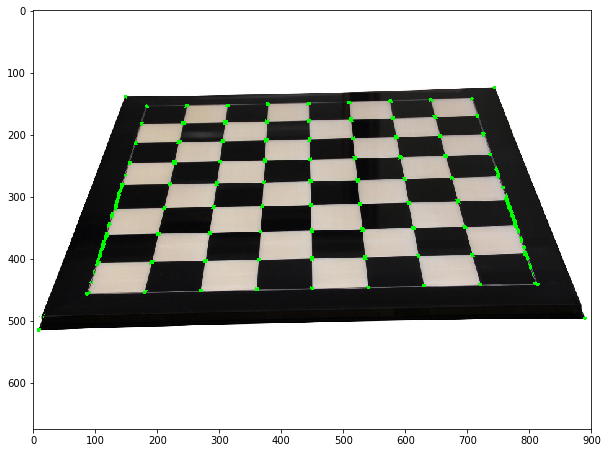

In [4]:
def harris_corners(img_orig_clr, img_orig_gray):

    img_clr = img_orig_clr.copy()
    img_gray = img_orig_gray.copy()
    
    #Conversion to float is a prerequisite for the algorithm
    img_gray = np.float32(img_gray)
    
    # 3 as block_size, 3 as_size aperture_size, k = 0.04 is Harris detector free parameter
    corners_img = cv2.cornerHarris(img_gray, 5, 3, 0.04)
    
    #Marking the corners in Green
    img_clr[corners_img > 0.00005*corners_img.max()] = [0,255,0]

    return img_clr

img = harris_corners(imgBGR, imgGRAY)

figure(figsize = (10, 10))
plt.imshow(img[...,::-1])
plt.show()

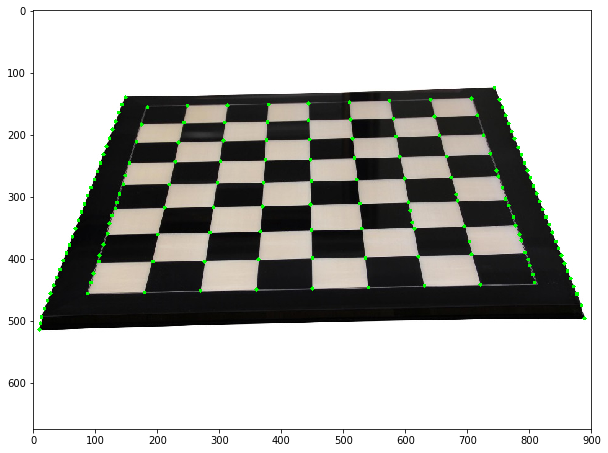

In [5]:
def shi_tomasi(img_orig_clr, img_orig_gray):

    img_clr = img_orig_clr.copy()
    img_gray = img_orig_gray.copy()

    #Specifying maximum number of corners as 1000
    # 0.01 is the minimum quality level below which the corners are rejected
    # 10 is the minimum euclidean distance between two corners
    corners_img = cv2.goodFeaturesToTrack(img_gray, 1000, 0.01, 10)
    
    corners_img = np.int0(corners_img)

    for corners in corners_img:
       
        x,y = corners.ravel()
        #Circling the corners in green
        cv2.circle(img_clr, (x,y), 3, [0,255,0], -1)

    return img_clr


img = shi_tomasi(imgBGR, imgGRAY)

figure(figsize = (10, 10))
plt.imshow(img[...,::-1])
plt.show()

#### ========================================
#### SURF, SIFT, ORB options of Features Detections
#### ========================================

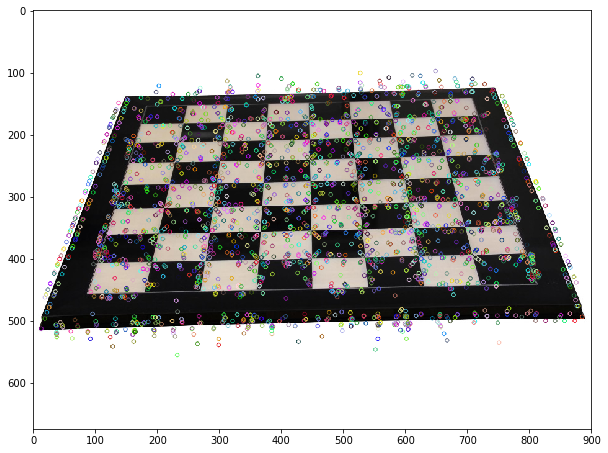

In [6]:
surf = cv2.xfeatures2d.SURF_create()
#sift = cv2.xfeatures2d.SIFT_create()
#orb = cv2.ORB_create(nfeatures=1000)

key_points, descriptors = surf.detectAndCompute(imgGRAY.copy(), None)
img = cv2.drawKeypoints(imgBGR[...,::-1], key_points, None)

figure(figsize = (10, 10))
plt.imshow(img)
plt.show()